In [1]:
import os
import pickle
import gc
import pandas as pd
import numpy as np
from tqdm import tqdm
from utils import load_pickle, dump_pickle, raw_data_path, feature_data_path

In [2]:
def extract_ctr(data, feature, alias):
    '''统计给定数据的转化率
    
    '''
    query_cnt = data.groupby([feature]).size().reset_index().rename(columns={0: 'query_cnt'})
    conversion_cnt = data[data['is_trade'] == 1].groupby([feature]).size().reset_index().rename(columns={0: 'conversion_cnt'})
    ctr = pd.merge(query_cnt, conversion_cnt, how='left', on=[feature])
    ctr[['conversion_cnt']] = ctr[['conversion_cnt']].fillna(0)
    ctr[alias] = ctr['conversion_cnt'] / ctr['query_cnt']
    return ctr

In [3]:
%time all_data = load_pickle(raw_data_path + 'all_data.pkl')

CPU times: user 8.39 s, sys: 11.2 s, total: 19.6 s
Wall time: 29.3 s


In [6]:
data = all_data[all_data.is_trade != -1]
data = data[data.day == 7]

ctr_day_7 = extract_ctr(data, feature='hour', alias='feature_ctr')
ctr_day_7

,hour,query_cnt,conversion_cnt,feature_ctr
0,0,176798,8860,0.050114
1,1,96070,4331,0.045082
2,2,43315,1848,0.042664
3,3,25404,1098,0.043222
4,4,19158,881,0.045986
5,5,24391,1104,0.045263
6,6,55359,2458,0.044401
7,7,106500,4906,0.046066
8,8,125187,6001,0.047936
9,9,135256,6390,0.047244


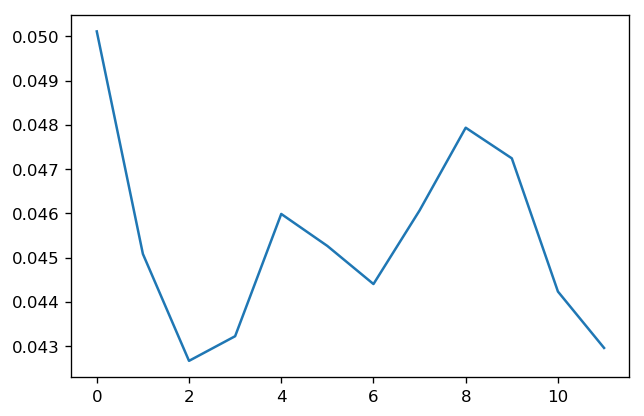

In [7]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

plt.plot(ctr_day_7['feature_ctr'])

In [3]:
%time all_data = load_pickle(feature_data_path + 'all_data_all_features.pkl')

CPU times: user 2.72 s, sys: 1min 11s, total: 1min 14s
Wall time: 1min 33s


,minute_bin,query_cnt,conversion_cnt,feature_ctr
0,"(-0.059, 9.833]",22384,981,0.043826
1,"(9.833, 19.667]",19768,886,0.044820
2,"(19.667, 29.5]",16642,793,0.047651
3,"(29.5, 39.333]",13980,615,0.043991
4,"(39.333, 49.167]",12504,571,0.045665
5,"(49.167, 59.0]",10792,485,0.044941


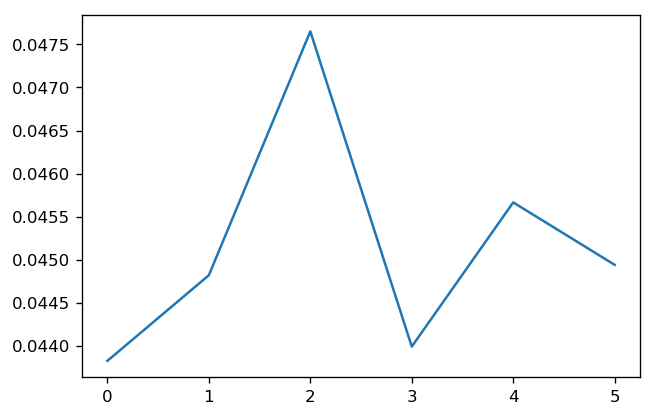

In [4]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt


all_data['minute_bin'] = pd.cut(all_data.minute, bins=6)
ctr_minute = extract_ctr(all_data[(all_data.day == 7) & (all_data.hour == 1)], feature='minute_bin', alias='feature_ctr')
plt.plot(ctr_minute['feature_ctr'])
ctr_minute

,hour_bin,query_cnt,conversion_cnt,feature_ctr
0,"(-0.023, 1.917]",8976,86,0.009581
1,"(1.917, 3.833]",2932,31,0.010573
2,"(3.833, 5.75]",4133,37,0.008952
3,"(5.75, 7.667]",17259,222,0.012863
4,"(7.667, 9.583]",26406,386,0.014618
5,"(9.583, 11.5]",31895,425,0.013325
6,"(11.5, 13.417]",33793,356,0.010535
7,"(13.417, 15.333]",35757,353,0.009872
8,"(15.333, 17.25]",30405,313,0.010294
9,"(17.25, 19.167]",40689,415,0.010199


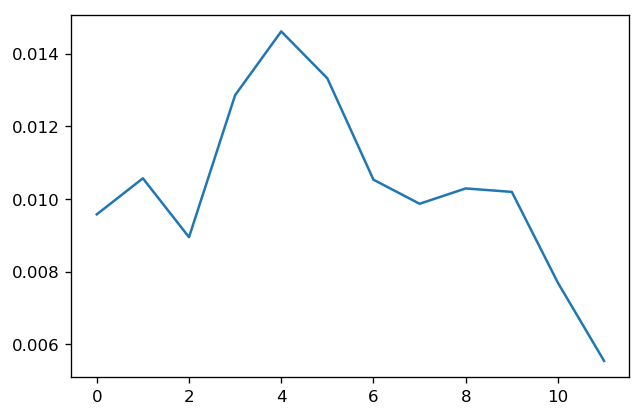

In [22]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

# ctr_day_2 = extract_ctr(all_data[all_data.day ==2], feature='hour', alias='feature_ctr')
# ctr_day_3 = extract_ctr(all_data[all_data.day ==3], feature='hour', alias='feature_ctr')
# ctr_day_4 = extract_ctr(all_data[all_data.day ==4], feature='hour', alias='feature_ctr')
# ctr_day_5 = extract_ctr(all_data[all_data.day ==5], feature='hour', alias='feature_ctr')
# ctr_day_6 = extract_ctr(all_data[all_data.day ==6], feature='hour', alias='feature_ctr')
# ctr_day_7 = extract_ctr(all_data[all_data.day ==7], feature='hour', alias='feature_ctr')


all_data['hour_bin'] = pd.cut(all_data.hour, bins=12)
ctr_hour = extract_ctr(all_data[(all_data.day != 7) & (all_data.user_age_level_item_price_level==3)], feature='hour_bin', alias='feature_ctr')


# plt.plot(ctr_hour['feature_ctr'][1:12])
# plt.plot(ctr_day_7['feature_ctr'][1:12])

# item_price_level_bin_edges = [-1, 3, 4, 5, 6, 7, 100]

plt.plot(ctr_hour['feature_ctr'])
# plt.plot(ctr_day_2['feature_ctr'])
# plt.plot(ctr_day_3['feature_ctr'])
# plt.plot(ctr_day_4['feature_ctr'])
# plt.plot(ctr_day_5['feature_ctr'])
# plt.plot(ctr_day_6['feature_ctr'])

ctr_hour

